In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/starbucks.csv', parse_dates=True, index_col='Date')
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [4]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

make sure that index is of datetime otherwise use <br> 
**df.index = pd.to_datetime(df.index)**

## line plots

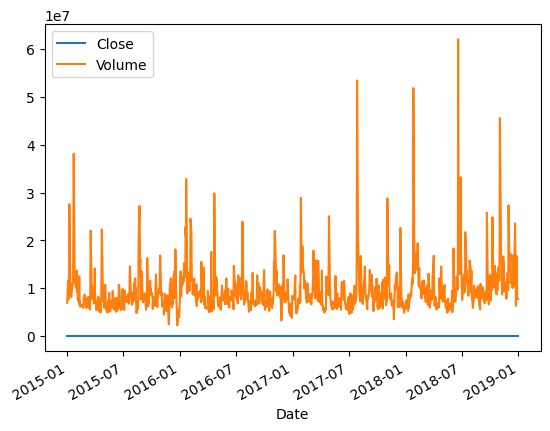

In [6]:
# plot all columns
df.plot();

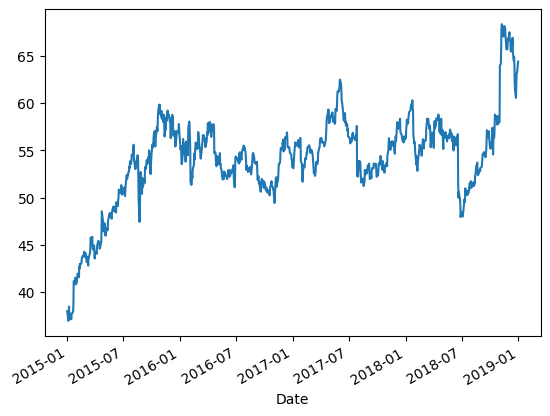

In [7]:
# plot specific column
df['Close'].plot();

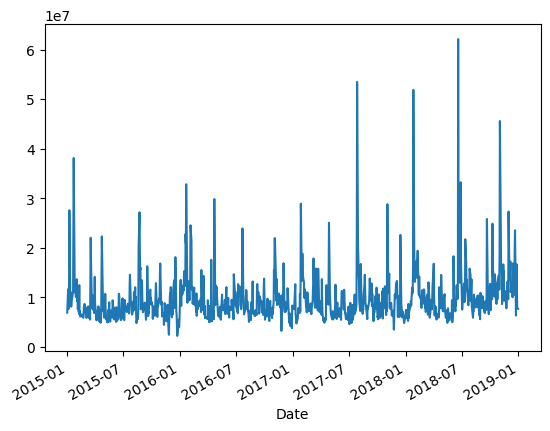

In [8]:
df['Volume'].plot();

## bar plots

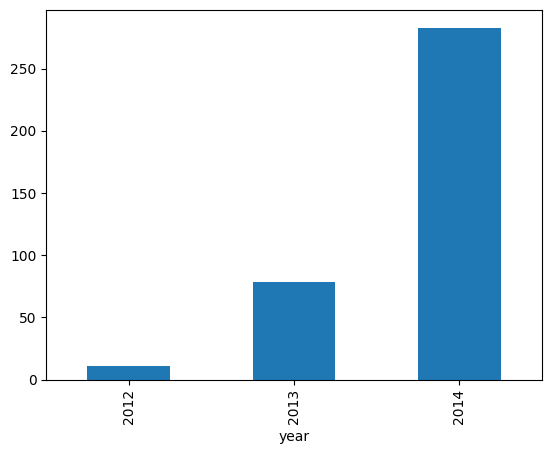

/tmp/ipykernel_27287/953370787.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2013'].groupby('month')['Count'].mean().plot.bar()


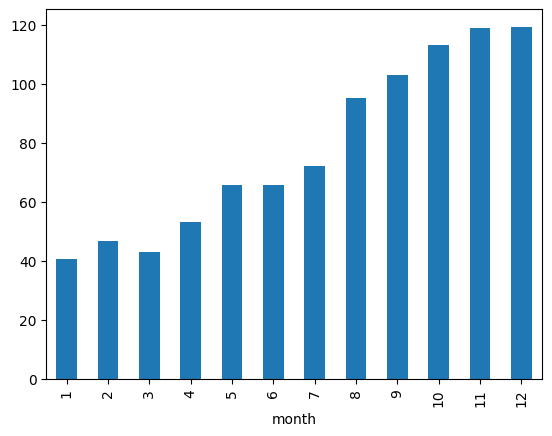

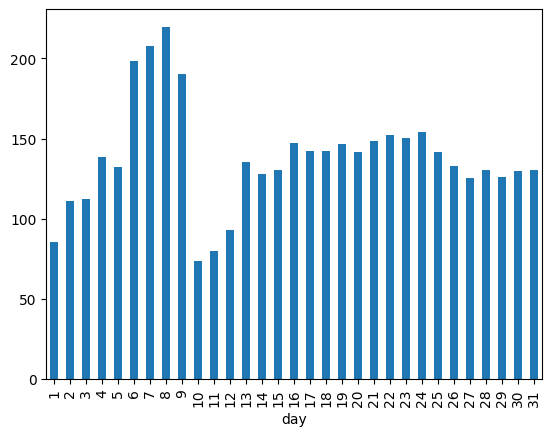

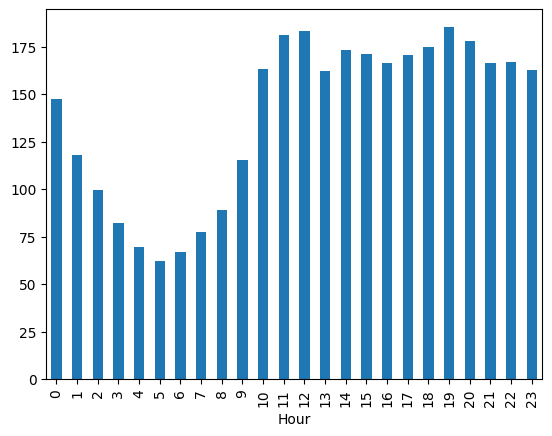

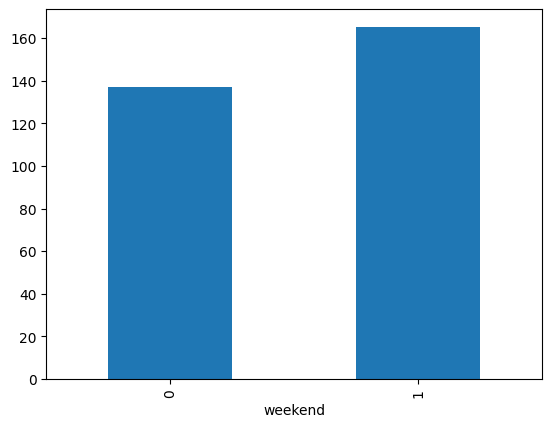

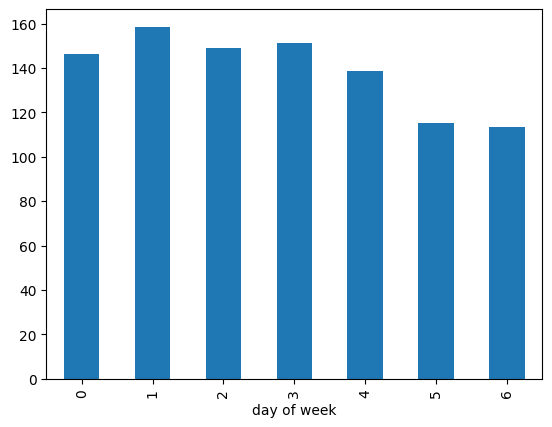

In [10]:
# read datasets
data = pd.read_csv("data/timeseries_count.csv", parse_dates=True, index_col='Datetime') 

# plot data as per year
data['year'] = data.index.year
data.groupby('year')['Count'].mean().plot.bar()
plt.show()
# increasing with year

# plot data as per month
data['month'] = data.index.month
data['2013'].groupby('month')['Count'].mean().plot.bar()
plt.show()
# increasing as the end of year approaches
# taken only for 2013 as 2012 & 2014 data is not properly collected

# plot data as per day
data['day'] = data.index.day
data.groupby('day')['Count'].mean().plot.bar()
plt.show()

# plot data as per hours
data['Hour'] = data.index.hour
data.groupby('Hour')['Count'].mean().plot.bar()
plt.show()
# peak traffic is at 7pm then a decreasing trend till 5am

# plot data as per weekdays
data['weekend'] = data.index
data['weekend'] = data['weekend'].apply(lambda x: 1 if x.day==5 or x.day==6 else 0)
data.groupby('weekend')['Count'].mean().plot.bar()
plt.show()
# traffic is more on week days than weekends

# plot week day wise
data['day of week'] = data.index.dayofweek
data.groupby('day of week')['Count'].mean().plot.bar()
plt.show()
# lesser traffic on 5/6 than other days

## adding title, labels and autoscaling

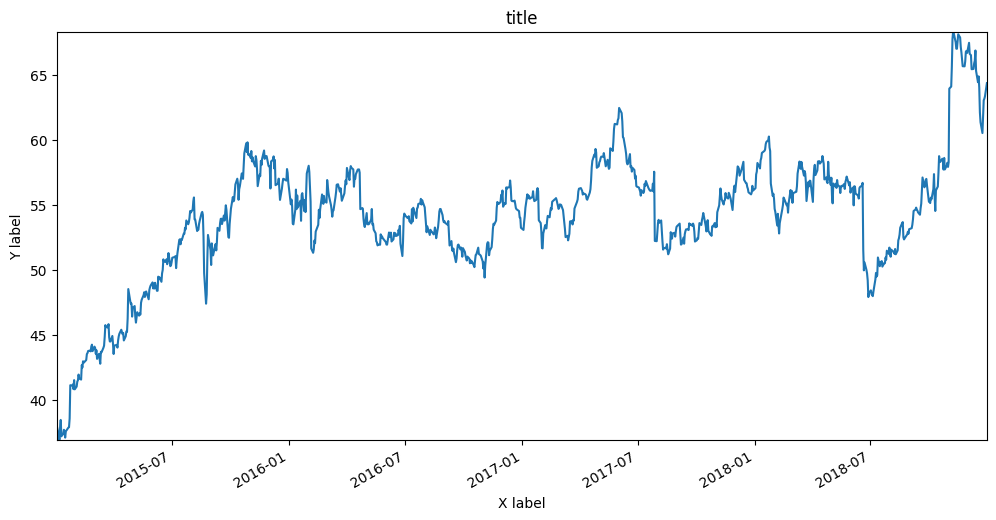

In [9]:
title = 'title'
ylabel = 'Y label'
xlabel = 'X label'

ax = df['Close'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='both', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

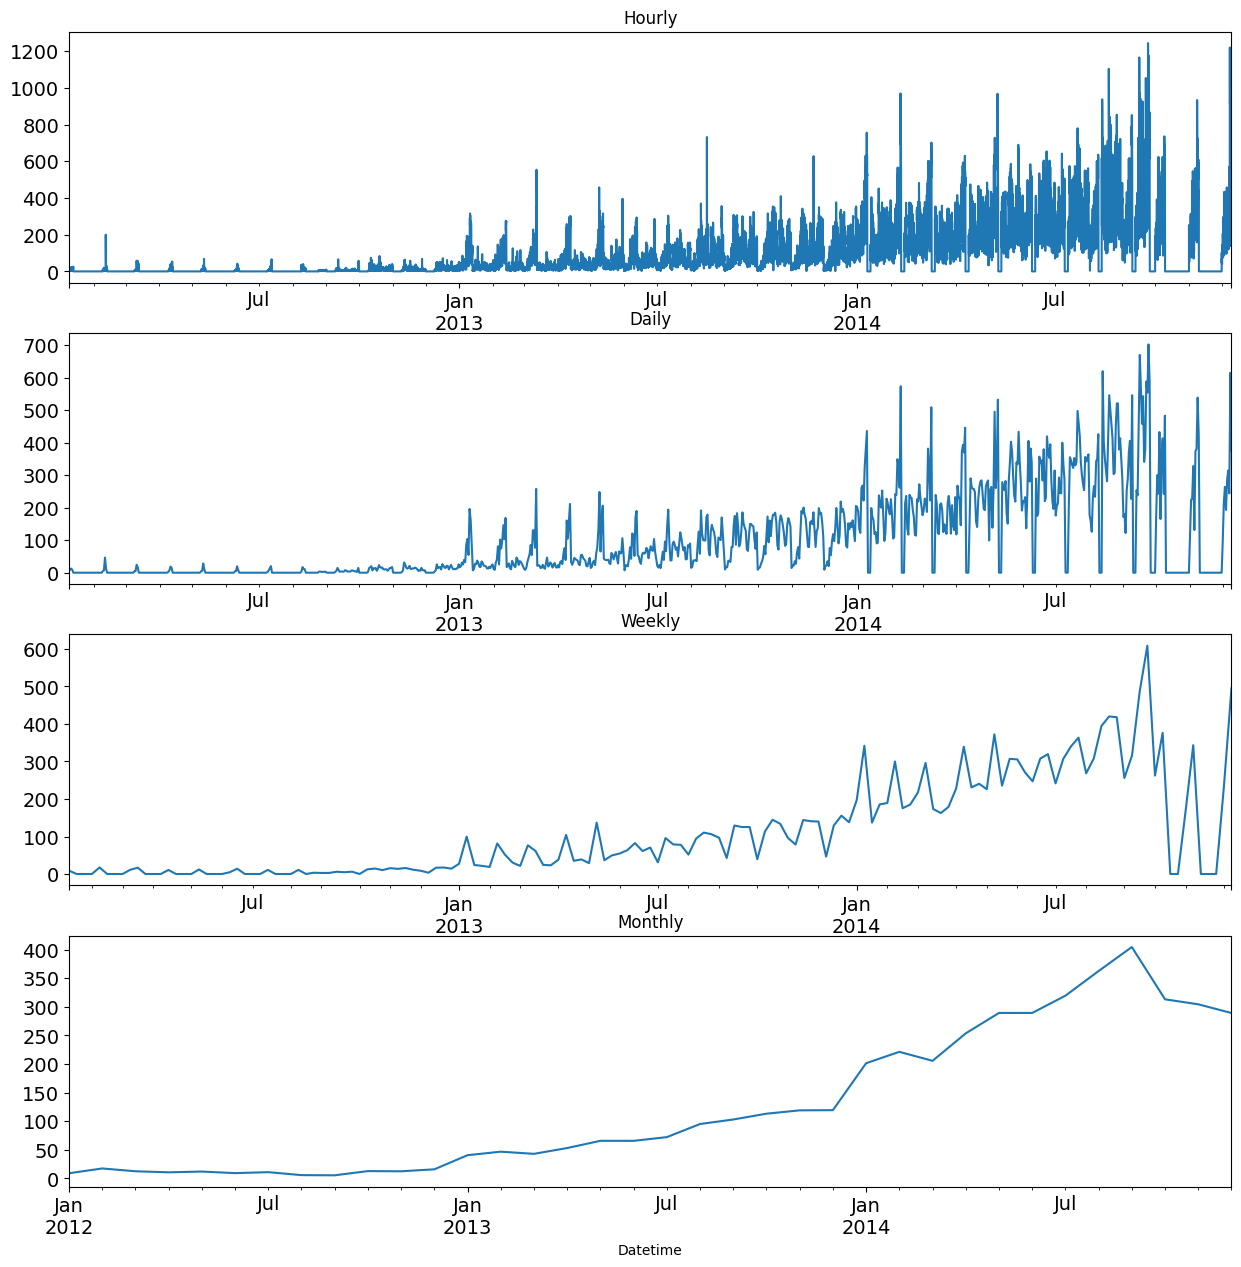

In [14]:
# Hourly time series
hourly = data.resample('H').mean()
hourly = hourly.fillna(0)

# Converting to daily mean
daily = data.resample('D').mean()
daily = daily.fillna(0)

# Converting to weekly mean
weekly = data.resample('W').mean()
weekly = weekly.fillna(0)

# Converting to monthly mean
monthly = data.resample('M').mean()
monthly = monthly.fillna(0)

# plotting complete data
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,15), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,15), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,15), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,15), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

## plot with a limit on x
NOTE: It's worth noting that the limit values do not have to appear in the index. Pandas will plot the actual dates based on their location in time.

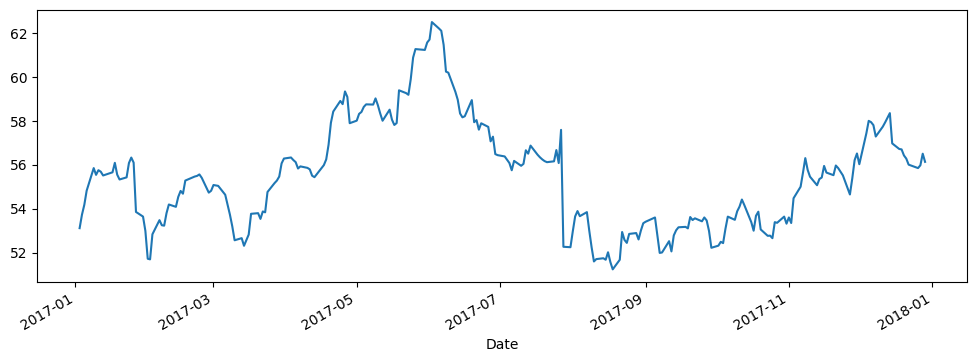

In [10]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4));

<AxesSubplot:xlabel='Date'>

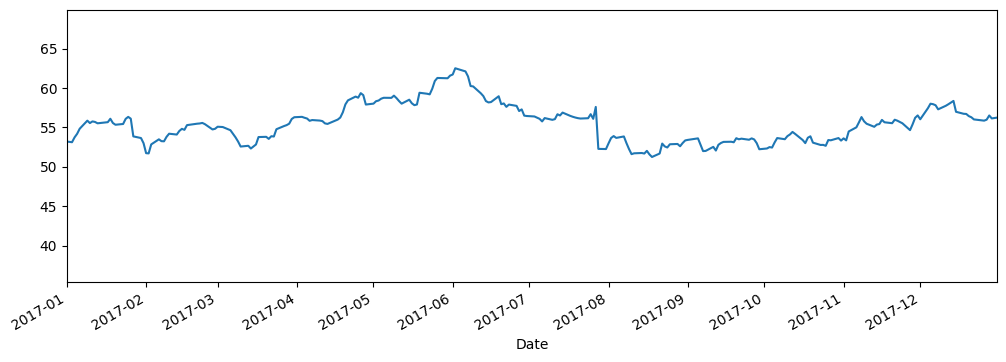

In [12]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01','2017-12-31'])

## plot with limit on x & y axis

<AxesSubplot:xlabel='Date'>

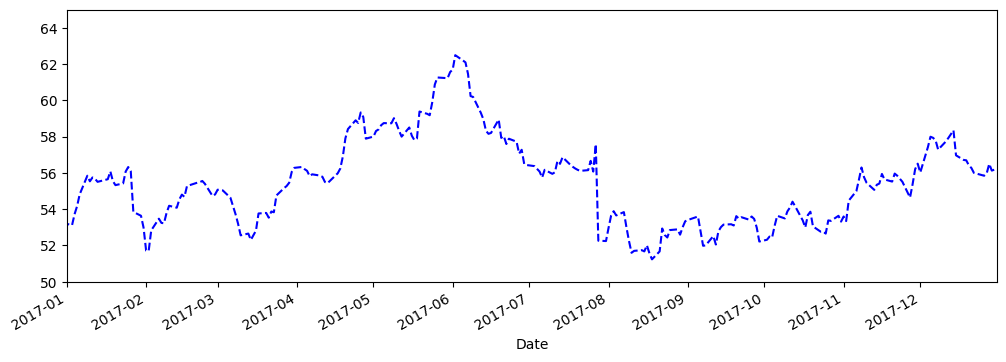

In [15]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01','2017-12-31'], ylim=[50,65], ls='--', c='blue')

## X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [16]:
from matplotlib import dates

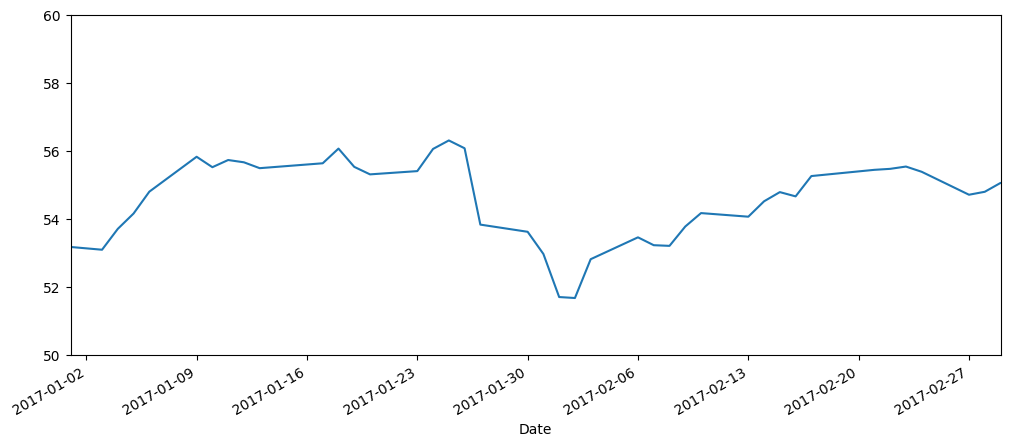

In [17]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with byweekday=0, or Mondays.
For a full list of locator options available from matplotlib.dates visit https://matplotlib.org/stable/api/dates_api.html 

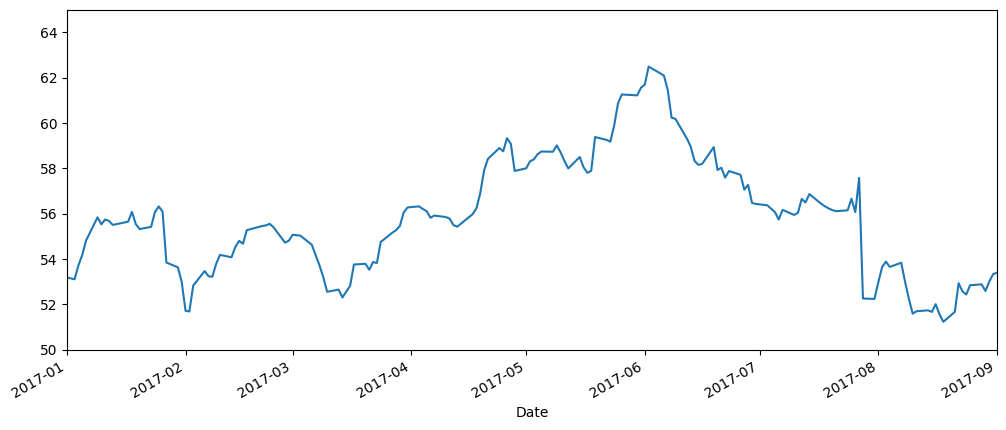

In [20]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-09-01'], ylim=[50,65], figsize=(12,5))
ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=None, bymonthday=1, interval=1))

### Date Formatting
formating the date index on x-axis

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

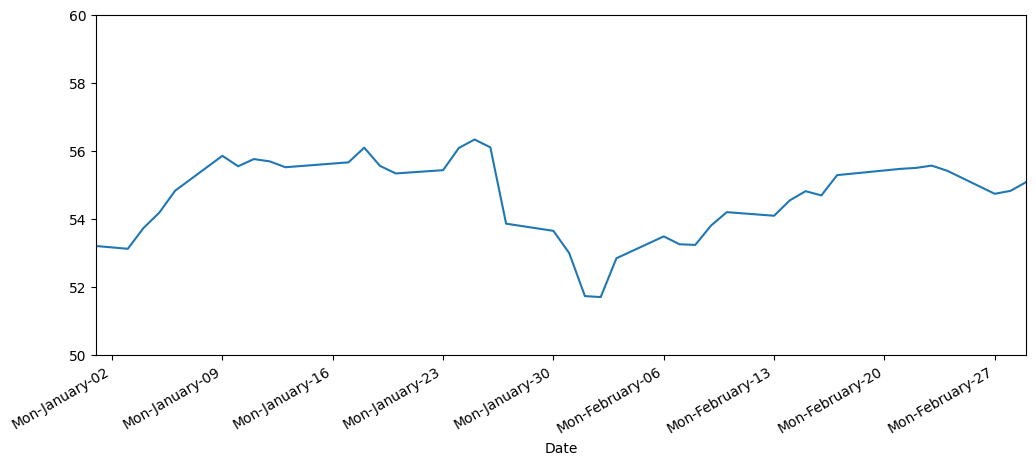

In [21]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

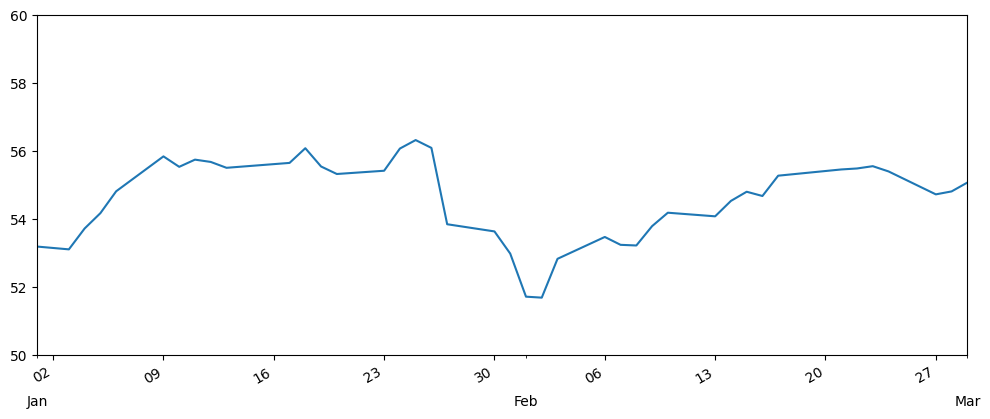

In [22]:
ax = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax.set(xlabel='')
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

adding minor axis in x axis